<a href="https://colab.research.google.com/github/pennya6/CJ_project/blob/main/%EA%B2%80%EC%83%89%EB%9F%89_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
top10=pd.read_csv("/content/drive/Shareddrives/2021 CJ 대한통운 공모전/data/crawling_data/top10/TOP10.csv")

In [ ]:
top10

,Unnamed: 0,순위,가구,디지털,면세점,생활건강,스포츠레저,식품,여가생활편의,패션잡화,패션의류,출산육아,화장품미용
0,0,1,책상,마우스,불리목욕하는여인,마스크,여성골프웨어,닭가슴살,제주렌트카,나이키데이브레이크,원피스,크록스키즈,바디미스트
1,1,2,화장대,무선키보드세트,아크메드라비반팔,kf94마스크,등산화,미역국수,문화상품권,나이키운동화,트위드자켓,키즈경량패딩,가히멀티밤
2,2,3,행거,닌텐도스위치,널디후드집업,스타벅스텀블러,k2플라이하이크,오메가3,제주도렌트카,크록스,트렌치코트,키즈바람막이,헤라블랙쿠션
3,3,4,쇼파,에어팟프로,백아율오리진크림,와플팬,캠핑의자,쌀20kg,꽃배달,운동화,나이키바람막이,키즈운동화,인셀덤
4,4,5,침대,공기청정기,육심원가방,kf94마스크새부리형,자전거,콤부차,캠핑카렌트,뉴발란스327,블라우스,베베드피노,ahc아이크림
5,5,6,컴퓨터책상,냉장고,키엘오리지널머스크블랜드,텀블러,전기자전거,생수,신세계상품권,나이키에어맥스97,바람막이,아디다스키즈운동화,닥터지선크림
6,6,7,전신거울,노트북,미니멜리사190,마스크스트랩,텐트,그릭요거트,제주도항공권,슬리퍼,후드집업,뉴발란스키즈,피지오겔페이셜크림
7,7,8,책장,다이슨에어랩,양키캔들그린하우스,화분,캠핑테이블,유산균,머지포인트,아디다스운동화,여자트렌치코트,나이키키즈운동화,피지오겔
8,8,9,앞치마,에어프라이어,휘게릴리프선모이스처라이저,전자담배,캠핑용품,콜라겐,구글기프트카드,뉴발란스530,롱원피스,미니멜리사,헤어에센스
9,9,10,식탁의자,전자레인지,샬랑드파리쿠션,빨래건조대,차박텐트,햇반,생화,카드지갑,여성트레이닝세트,휠라키즈운동화,선크림


In [ ]:
top10=top10.drop('Unnamed: 0',axis=1)

In [ ]:
top10

,순위,가구,디지털,면세점,생활건강,스포츠레저,식품,여가생활편의,패션잡화,패션의류,출산육아,화장품미용
0,1,책상,마우스,불리목욕하는여인,마스크,여성골프웨어,닭가슴살,제주렌트카,나이키데이브레이크,원피스,크록스키즈,바디미스트
1,2,화장대,무선키보드세트,아크메드라비반팔,kf94마스크,등산화,미역국수,문화상품권,나이키운동화,트위드자켓,키즈경량패딩,가히멀티밤
2,3,행거,닌텐도스위치,널디후드집업,스타벅스텀블러,k2플라이하이크,오메가3,제주도렌트카,크록스,트렌치코트,키즈바람막이,헤라블랙쿠션
3,4,쇼파,에어팟프로,백아율오리진크림,와플팬,캠핑의자,쌀20kg,꽃배달,운동화,나이키바람막이,키즈운동화,인셀덤
4,5,침대,공기청정기,육심원가방,kf94마스크새부리형,자전거,콤부차,캠핑카렌트,뉴발란스327,블라우스,베베드피노,ahc아이크림
5,6,컴퓨터책상,냉장고,키엘오리지널머스크블랜드,텀블러,전기자전거,생수,신세계상품권,나이키에어맥스97,바람막이,아디다스키즈운동화,닥터지선크림
6,7,전신거울,노트북,미니멜리사190,마스크스트랩,텐트,그릭요거트,제주도항공권,슬리퍼,후드집업,뉴발란스키즈,피지오겔페이셜크림
7,8,책장,다이슨에어랩,양키캔들그린하우스,화분,캠핑테이블,유산균,머지포인트,아디다스운동화,여자트렌치코트,나이키키즈운동화,피지오겔
8,9,앞치마,에어프라이어,휘게릴리프선모이스처라이저,전자담배,캠핑용품,콜라겐,구글기프트카드,뉴발란스530,롱원피스,미니멜리사,헤어에센스
9,10,식탁의자,전자레인지,샬랑드파리쿠션,빨래건조대,차박텐트,햇반,생화,카드지갑,여성트레이닝세트,휠라키즈운동화,선크림


In [ ]:
top10['가구'][0]

'책상'

In [ ]:
type(top10['가구'][0])

str

In [ ]:
top10.loc[:0,'가구']

0    책상
Name: 가구, dtype: object

In [ ]:
import os
import sys
import urllib.request
import json
import pandas as pd


In [ ]:
client_id="l54OU3RyAxGlGgRaggwl"
client_secret="rMEF6wnAEF"


In [ ]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-06-30\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}]}";

In [ ]:
body

'{"startDate":"2021-03-01","endDate":"2021-06-30","timeUnit":"date","keywordGroups":[{"groupName":"CJ","keywords":["CJ"]}]}'

In [ ]:
json_body=json.loads(body)

In [ ]:
json_body

{'endDate': '2021-06-30',
 'keywordGroups': [{'groupName': 'CJ', 'keywords': ['CJ']}],
 'startDate': '2021-03-01',
 'timeUnit': 'date'}

In [ ]:
for keyword in json_body['keywordGroups']:
  keyword['groupName']=top10['가구'][0]
  keyword['keywords']=list(top10['가구'][0])

In [ ]:
json_body

{'endDate': '2021-06-30',
 'keywordGroups': [{'groupName': '책상', 'keywords': ['책', '상']}],
 'startDate': '2021-03-01',
 'timeUnit': 'date'}

In [ ]:
body=json.dumps(json_body,ensure_ascii=False)

In [ ]:
body=str(body)

In [ ]:
body

'{"startDate": "2021-03-01", "endDate": "2021-06-30", "timeUnit": "date", "keywordGroups": [{"groupName": "책상", "keywords": ["책", "상"]}]}'

In [ ]:
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    output_data=response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

In [ ]:
result=json.loads(output_data)

In [ ]:
result

{'endDate': '2021-06-30',
 'results': [{'data': [{'period': '2021-03-01', 'ratio': 29.23785},
    {'period': '2021-03-02', 'ratio': 36.35418},
    {'period': '2021-03-03', 'ratio': 38.79809},
    {'period': '2021-03-04', 'ratio': 40.70717},
    {'period': '2021-03-05', 'ratio': 35.55192},
    {'period': '2021-03-06', 'ratio': 25.33056},
    {'period': '2021-03-07', 'ratio': 29.89154},
    {'period': '2021-03-08', 'ratio': 38.24097},
    {'period': '2021-03-09', 'ratio': 36.9633},
    {'period': '2021-03-10', 'ratio': 34.79423},
    {'period': '2021-03-11', 'ratio': 35.03937},
    {'period': '2021-03-12', 'ratio': 33.41999},
    {'period': '2021-03-13', 'ratio': 23.40662},
    {'period': '2021-03-14', 'ratio': 28.15332},
    {'period': '2021-03-15', 'ratio': 33.24171},
    {'period': '2021-03-16', 'ratio': 31.67434},
    {'period': '2021-03-17', 'ratio': 33.17486},
    {'period': '2021-03-18', 'ratio': 31.88233},
    {'period': '2021-03-19', 'ratio': 30.83494},
    {'period': '2021-03-2

In [ ]:
date = [a['period'] for a in result['results'][0]['data']]

ratio = [a['ratio'] for a in result['results'][0]['data']]

new=pd.DataFrame({'date':date, 
              'output':ratio})

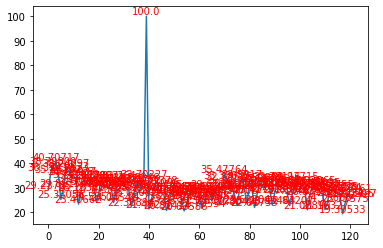

In [ ]:
import matplotlib.pyplot as plt

plt.plot(new.index,new['output'])

for x,y in enumerate(list(new['output'])):
  plt.text(x,y,y,fontsize=10,color="#ff0000",horizontalalignment='center',verticalalignment='bottom')

plt.show()